In [1]:
import reskit as rk
import pandas as pd
import pvlib
import geokit as gk
import xarray as xr
import netCDF4 as nc
from reskit import WorkflowManager

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
placements = pd.DataFrame()
placements['lon'] = [ 36.24558, 36.24583, 36.24609, 36.24623, 36.24637]     # Longitude
placements['lat'] = [ 28.16104, 28.16113, 28.16120, 28.16137, 28.16109]    # Latitude
placements['tilt'] = [ 25, 25, 25, 25, 25 ]   # System tilt in degrees (based on paper and annual energy demand profile)
placements['azimuth'] = [ 180, 180, 180, 180, 180 ]# System azimuth in degrees (orientation) south facing
placements['capacity'] = [ 21.9, 17.5, 0, 15, 26.25 ] # Total system capacity in kW per available roof area 
placements['elev'] = [ 0, 0, 0, 0, 0 ]      # Altitute in meters

placements

,lon,lat,tilt,azimuth,capacity,elev
0,36.24558,28.16104,25,180,21.90,0
1,36.24583,28.16113,25,180,17.50,0
2,36.24609,28.16120,25,180,0.00,0
3,36.24623,28.16137,25,180,15.00,0
4,36.24637,28.16109,25,180,26.25,0


In [3]:
src_sarah=rk.weather.SarahSource(r"/Users/zaramulholland/reskit/reskit/_test/data/SARAH_try"),
src_era5=rk.weather.Era5Source(r"/Users/zaramulholland/reskit/reskit/_test/data/ERA5_try")

/Users/zaramulholland/reskit/reskit/_test/data/SARAH_try/SARAH-DNI.rhodes.y2016.nc
/Users/zaramulholland/reskit/reskit/_test/data/SARAH_try/SARAH-SIS.rhodes.y2016.nc
/Users/zaramulholland/reskit/reskit/_test/data/ERA5_try/reanalysis-era5-single-levels.rhodes.y2016.10m_wind_speed.processed.nc
/Users/zaramulholland/reskit/reskit/_test/data/ERA5_try/reanalysis-era5-single-levels.rhodes.y2016.2m_dewpoint_temperature.nc
/Users/zaramulholland/reskit/reskit/_test/data/ERA5_try/reanalysis-era5-single-levels.rhodes.y2016.2m_temperature.nc
/Users/zaramulholland/reskit/reskit/_test/data/ERA5_try/reanalysis-era5-single-levels.rhodes.y2016.surface_pressure.nc


In [4]:
sim_result = rk.solar.openfield_pv_sarah_unvalidated(
    placements=placements,
    sarah_path=r"/Users/zaramulholland/reskit/reskit/_test/data/SARAH_try",
    era5_path=r"/Users/zaramulholland/reskit/reskit/_test/data/ERA5_try",
    module='LG_Electronics_Inc__LG365Q1C_A5',
    tracking='fixed'
)

# LG Electronics Inc. LG365Q1C-A5

/Users/zaramulholland/opt/anaconda3/envs/reskit/lib/python3.8/site-packages/pvlib/irradiance.py:1059: RuntimeWarning: divide by zero encountered in true_divide
  eps = ((dhi + dni) / dhi + kappa * (z ** 3)) / (1 + kappa * (z ** 3))


In [5]:
output_df = sim_result['capacity_factor'].fillna(0).to_dataframe().unstack()


In [6]:
output_df.index = output_df.index.tz_localize(tz='UTC').tz_convert(tz='Europe/Athens')

In [7]:
output_df.columns = [('Building1'),
            ('Building2'),
            ('Building3'),
            ('Building4'),
            ('Building5')]

In [8]:
output_df.columns

Index(['Building1', 'Building2', 'Building3', 'Building4', 'Building5'], dtype='object')

In [9]:
output_df = output_df.resample('h').sum()

In [10]:
output_df

,Building1,Building2,Building3,Building4,Building5
time,,,,,
2016-01-01 02:00:00+02:00,0.0,0.0,0.0,0.0,0.0
2016-01-01 03:00:00+02:00,0.0,0.0,0.0,0.0,0.0
2016-01-01 04:00:00+02:00,0.0,0.0,0.0,0.0,0.0
2016-01-01 05:00:00+02:00,0.0,0.0,0.0,0.0,0.0
2016-01-01 06:00:00+02:00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2016-12-31 21:00:00+02:00,0.0,0.0,0.0,0.0,0.0
2016-12-31 22:00:00+02:00,0.0,0.0,0.0,0.0,0.0
2016-12-31 23:00:00+02:00,0.0,0.0,0.0,0.0,0.0


In [29]:
output_df.to_csv("/Users/zaramulholland/Desktop/IBC_25.csv")

AttributeError: 'DataArray' object has no attribute 'to_csv'

In [30]:
output_df2 = sim_result['total_system_generation'].fillna(0).to_dataframe().unstack()

In [31]:
output_df2.index = output_df2.index.tz_localize(tz='UTC').tz_convert(tz='Europe/Athens')

In [32]:
output_df2.columns = [('Building1'),
            ('Building2'),
            ('Building3'),
            ('Building4'),
            ('Building5')]

In [36]:
output_df2 = output_df2.resample('m').sum()

In [37]:
output_df2

,Building1,Building2,Building3,Building4,Building5
time,,,,,
2016-01-31 00:00:00+02:00,6511.592509,5203.715974,0.0,4460.871484,7806.486338
2016-02-29 00:00:00+02:00,6750.229128,5394.439142,0.0,4624.180641,8092.575820
2016-03-31 00:00:00+03:00,6944.847772,5549.961176,0.0,4757.791943,8325.323444
2016-04-30 00:00:00+03:00,7177.575894,5735.824898,0.0,4916.842207,8604.313570
2016-05-31 00:00:00+03:00,7424.174389,5933.025449,0.0,5086.201035,8900.893409
2016-06-30 00:00:00+03:00,7036.736831,5623.389902,0.0,4820.647871,8436.380448
2016-07-31 00:00:00+03:00,7277.437987,5815.800130,0.0,4985.595278,8725.145406
2016-08-31 00:00:00+03:00,6996.626561,5591.341306,0.0,4793.308180,8387.912246
2016-09-30 00:00:00+03:00,7113.667317,5684.850779,0.0,4873.361470,8528.711130


In [38]:
output_df2.to_csv("/Users/zaramulholland/Desktop/IBC_25_validation.csv")

(0.0, 70.0)

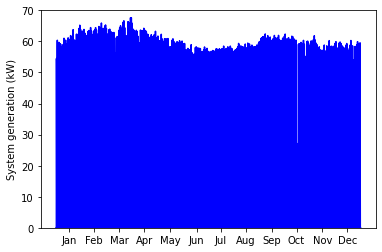

In [12]:
output_df =sim_result['total_system_generation'].sum("location")

plt.plot(output_df, color='blue')

plt.ylabel("System generation (kW)", )
plt.rcParams.update({'font.size': 12})
#positions = (744, 1416, 2160, 2880, 3624, 4344, 5088, 5832, 6552, 7296, 8016, 8760)
positions = (744, 2160, 3648, 5088, 6576, 8100, 9504, 10944, 12432, 13873, 15360, 16806)
labels = ("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")
plt.xticks(positions, labels)
plt.ylim(0, 70)
#plt.savefig("IBC25_Generation", dpi=800)

(0.0, 1.0)

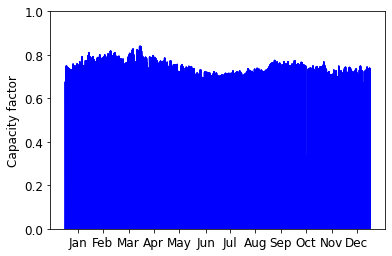

In [13]:
output_df2 =sim_result['capacity_factor']

plt.plot(output_df2, color='blue')

plt.ylabel("Capacity factor", )
plt.rcParams.update({'font.size': 12})
#positions = (744, 1416, 2160, 2880, 3624, 4344, 5088, 5832, 6552, 7296, 8016, 8760)
positions = (744, 2160, 3648, 5088, 6576, 8100, 9504, 10944, 12432, 13873, 15360, 16806)
labels = ("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")
plt.xticks(positions, labels)
plt.ylim(0, 1)
#plt.savefig("IBC25_Capacity", dpi=800)

([<matplotlib.axis.XTick at 0x7fdbd7011dc0>,
 [Text(744, 0, 'Jan'),
  Text(2160, 0, 'Feb'),
  Text(3648, 0, 'Mar'),
  Text(5088, 0, 'Apr'),
  Text(6576, 0, 'May'),
  Text(8100, 0, 'Jun'),
  Text(9504, 0, 'Jul'),
  Text(10944, 0, 'Aug'),
  Text(12432, 0, 'Sep'),
  Text(13873, 0, 'Oct'),
  Text(15360, 0, 'Nov'),
  Text(16806, 0, 'Dec')])

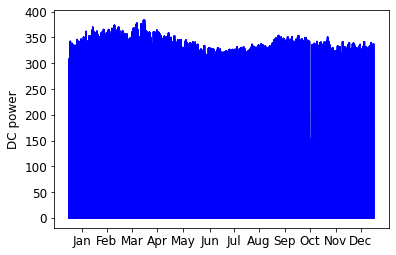

In [14]:
output_df3 =sim_result['module_dc_power_at_mpp']

plt.plot(output_df3, color='blue')

plt.ylabel("DC power", )
plt.rcParams.update({'font.size': 12})
#positions = (744, 1416, 2160, 2880, 3624, 4344, 5088, 5832, 6552, 7296, 8016, 8760)
positions = (744, 2160, 3648, 5088, 6576, 8100, 9504, 10944, 12432, 13873, 15360, 16806)
labels = ("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")
plt.xticks(positions, labels)
#plt.ylim(0, 1)
#plt.savefig("IBC25_Generation", dpi=800)


In [15]:
ts=sim_result['total_system_generation']


In [16]:
ts.head(5)

<xarray.DataArray 'total_system_generation' (time: 5, location: 5)>
array([[nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan]])
Coordinates:
  * location  (location) int64 0 1 2 3 4
  * time      (time) datetime64[ns] 2016-01-01 ... 2016-01-01T02:00:00

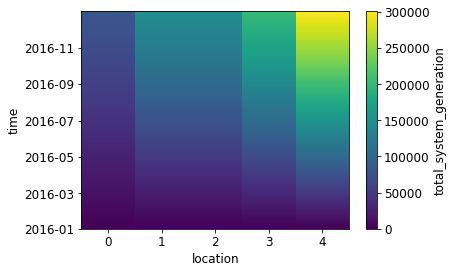

In [17]:
ts = ts.cumsum()
ts.plot()
plt.show() 

In [18]:
ts.head

<bound method DataArray.head of <xarray.DataArray 'total_system_generation' (time: 17568, location: 5)>
array([[     0.        ,      0.        ,      0.        ,
             0.        ,      0.        ],
       [     0.        ,      0.        ,      0.        ,
             0.        ,      0.        ],
       [     0.        ,      0.        ,      0.        ,
             0.        ,      0.        ],
       ...,
       [ 81611.22596318, 146830.62504224, 146830.62504224,
        202740.05657038, 300580.99914809],
       [ 81611.22596318, 146830.62504224, 146830.62504224,
        202740.05657038, 300580.99914809],
       [ 81611.22596318, 146830.62504224, 146830.62504224,
        202740.05657038, 300580.99914809]])
Coordinates:
  * location  (location) int64 0 1 2 3 4
  * time      (time) datetime64[ns] 2016-01-01 ... 2016-12-31T23:30:00>